# Let's Integrate Matplotlib with Tkinter!

I'm using [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-embed-matplotlib-charts-in-tkinter-gui/) as a starting place, then trying to build from there

In [2]:
import numpy as np
import pandas as pd

from tkinter import *
from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

In [2]:
def plot():
    global canvas
    if canvas:
        # This allows us to update the plot's canvas
        canvas.get_tk_widget().destroy()

    fig = plt.figure(figsize=(5, 5), dpi=100)

    # Plotting function: text1 ^ text2
    y = np.pow(np.arange(float(tx.get(1.0, 'end'))),
               float(ty.get(1.0, 'end')))

    ax1 = fig.add_subplot(111)

    ax1.scatter(np.arange(len(y)), y);

    # creating the Tkinter canvas 
    # containing the Matplotlib figure 
    canvas = FigureCanvasTkAgg(fig, 
                               master = window)   
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().grid(column=1, row=2, padx=10)

    plt.close()

window = Tk()
window.geometry("600x600")
# Allows me to use winfo_width() later on
window.update_idletasks()
# Trick for centering using the grid() geom manager
window.grid_columnconfigure(1, weight=1)

frame = LabelFrame(window, text='Plot values', width=int(window.winfo_width()/2), height=50)
# Prevents the grid from resizing based on its children
frame.grid_propagate(False)
frame.grid(column=1, row=0)
# Centers two items
frame.grid_columnconfigure(1, weight=1)
frame.grid_columnconfigure(2, weight=1)

# The two items I'm centering
tx = Text(frame, wrap='none', height=1, width=10)
ty = Text(frame, wrap='none', height=1, width=10)
tx.grid(column=1, row=0)
ty.grid(column=2, row=0)

# For use in the function to plot
canvas = None
  
# button that displays the plot 
plot_button = Button(master = window,  
                     command = plot, 
                     height = 2,  
                     width = 10, 
                     text = "Plot") 
  

plot_button.grid(column=1, row=1, pady=10)
  
# run the gui 
window.mainloop()

In [1]:
%run activity1.ipynb

joined = pd.DataFrame(joined) # Mostly for the environment's sake

df = joined.loc['Year 2'].sum(axis=0).T.groupby(['Location', 'Grade']).sum().T.unstack()
df['Passes'] = df.loc[:, ['D', 'M', 'P']].sum(axis=1)

Girls did better than boys in Psychology, by a weighted score difference of 336.0



C:\Users\wills\AppData\Local\Temp\ipykernel_34540\4280120509.py:9: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  subject_totals = groupby_cohort.groupby('Subject', axis=1).sum()
C:\Users\wills\AppData\Local\Temp\ipykernel_34540\1551108430.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  groupby_gender = joined.groupby('Gender').sum().groupby(['Subject', 'Grade'], axis=1).sum()
C:\Users\wills\AppData\Local\Temp\ipykernel_34540\1551108430.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  subject_totals = groupby_gender.groupby('Subject', axis=1).sum()
C:\Users\wills\AppData\Local\Temp\ipykernel_34540\536315421.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sg_g = pd.DataFrame(joined.groupby(['Subject', 'Grade'], axis=1).sum().

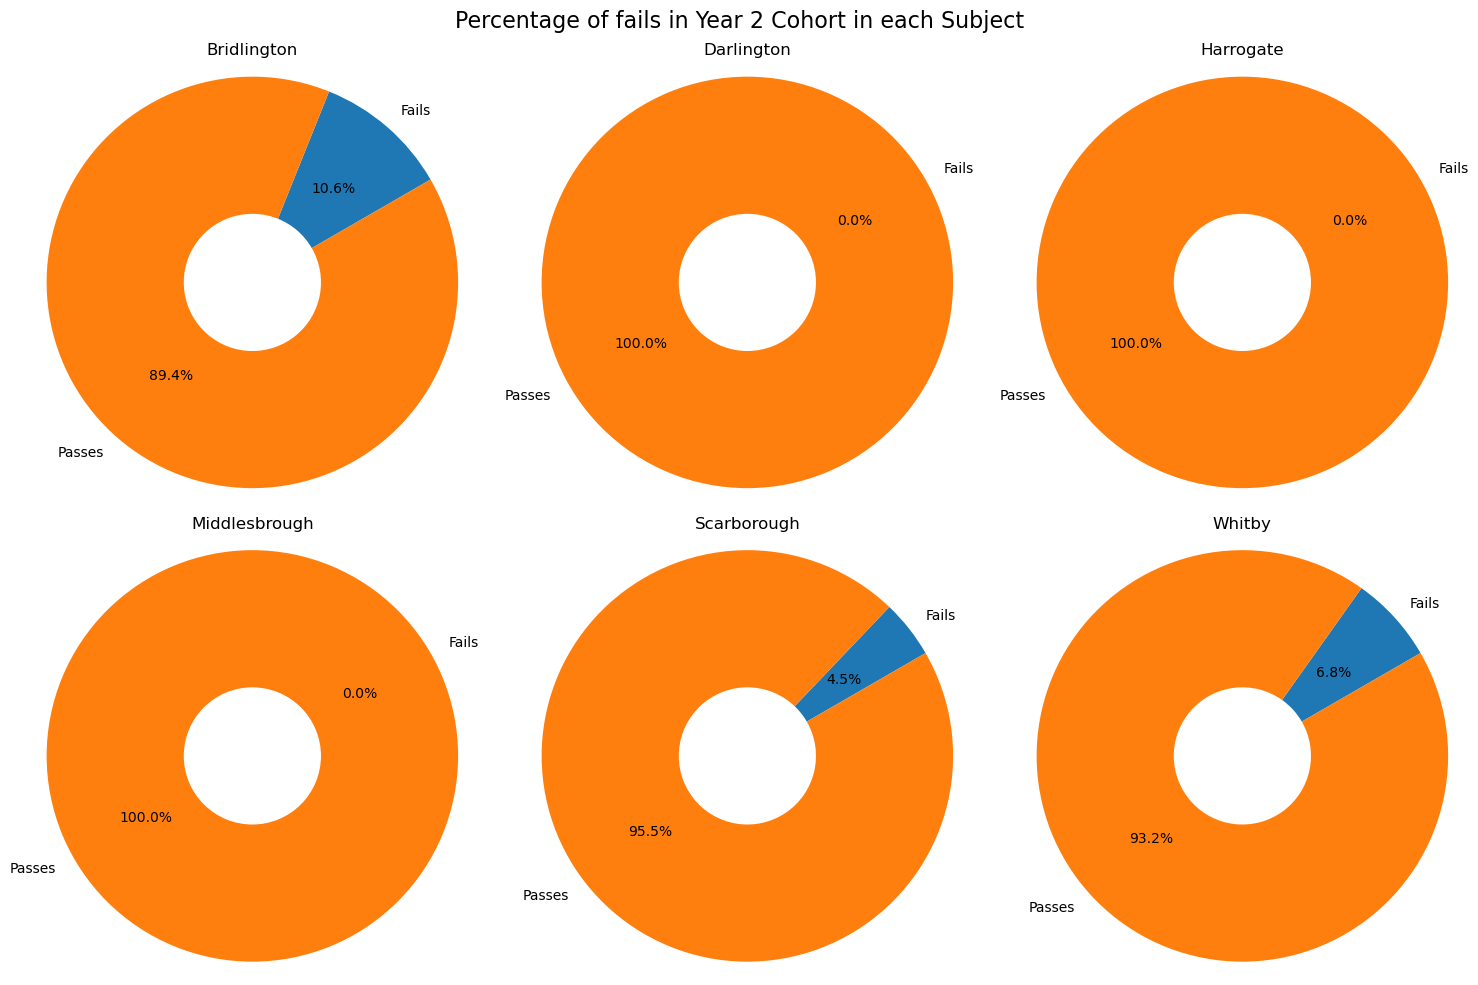

: 

In [ ]:
# Create subplots
num_subjects = len(df)
cols = 3  # Number of columns for the subplot grid
rows = -(-num_subjects // cols)  # Calculate rows needed (ceiling division)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axes array to easily iterate, even if grid is not perfect
axes = axes.flatten()

# Plot each subject's pie chart
for i, (subject, row) in enumerate(df.iterrows()):
    # Isolate Fails and Passes
    row = row[['F', 'Passes']]
    # Plot pie chart
    axes[i].pie(
        row, labels=row.index.map({'F': 'Fails', 'Passes': 'Passes'}), 
        autopct='%1.1f%%', 
        startangle=30,
        wedgeprops=dict(width=0.6666)
    )
    axes[i].set_title(subject)
    axes[i].axis("equal")  # Ensures the pie chart is circular

fig.suptitle('Percentage of fails in Year 2 Cohort in each Subject', fontsize=16);
plt.tight_layout()

# Reasoning for the pie chart

uh so pie charts are really good for representing proportions of a total. In this case, I'm trying to represent the proportion of students that did not fail their course. This also suggests I could represent this in relation to those who passed their course. Aggregating the pass scores allows me to represent passes vs fails as percentages of each group.

Let's try and put this into a GUI like the one in the first cell

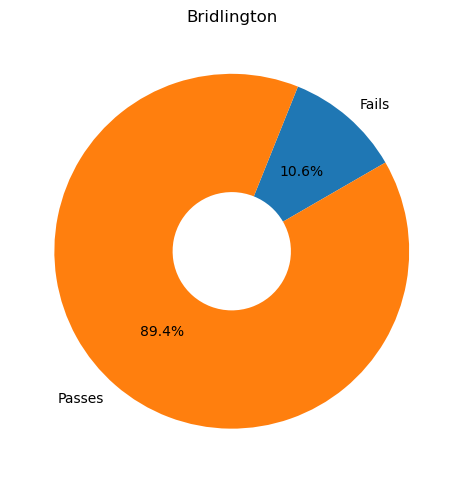

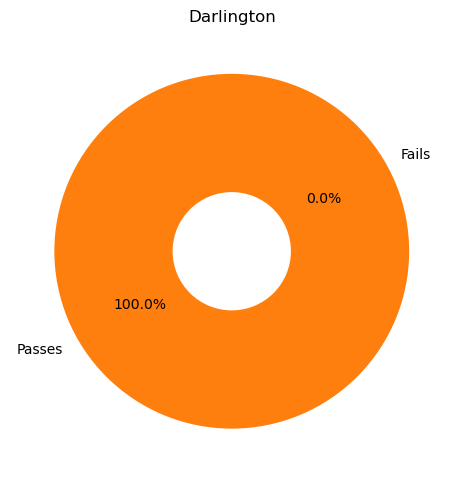

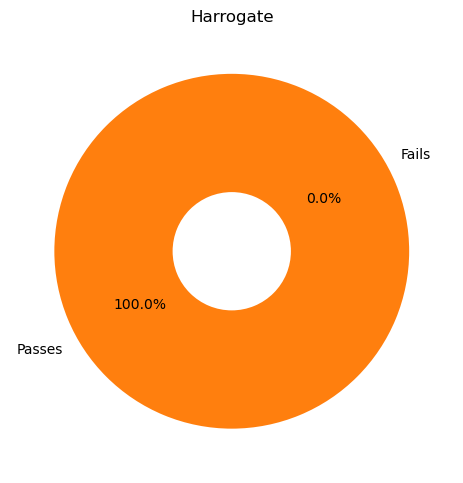

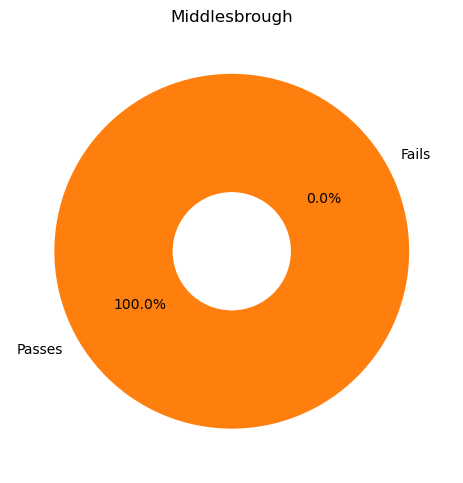

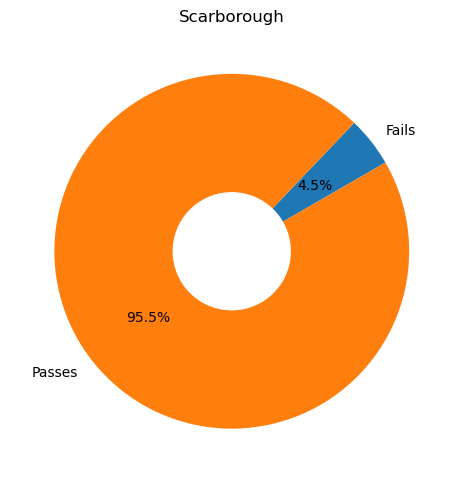

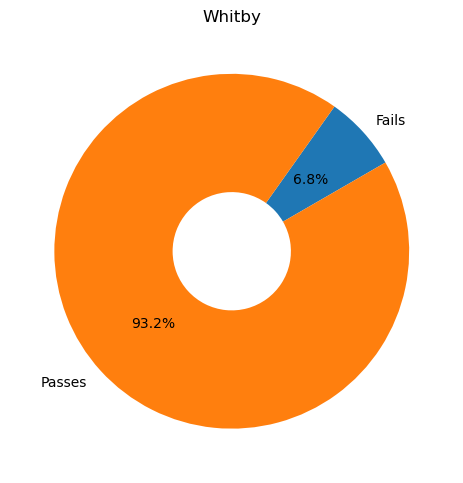

In [ ]:
class MyApplication(Tk):
    def __init__(self, name, geom):
        Tk.__init__(self)
        self.title(name)
        self.geometry(geom)
        self.update_idletasks()
        self.grid_columnconfigure(1, weight=1)
        self.bind('<Configure>', self.resize)

        self.btn = Button(self, text='Plot!', command=self.build_plot)
        self.btn.grid(column=1, row=1, pady=10)

        self.canvas = None

        self.hyp = np.sqrt(int(geom.split('x')[0])**2 + int(geom.split('x')[1])**2) // 3

    def resize(self, event):
        if str(event.widget) == '.' and self.canvas:
            self.hyp = np.sqrt(self.winfo_width()**2 + self.winfo_height()**2) // 3
            self.canvas.get_tk_widget().config(width=self.hyp, height=self.hyp)

    def build_plot(self):
        self.btn.grid_forget()

        self.nav_frame = Frame(self)
        self.nav_frame.grid(column=1, row=3, pady=10)

        self.prev_button = Button(self.nav_frame, text='Prev', command=self.show_prev_figure)
        self.prev_button.grid(column=0, row=0, padx=10)

        self.next_button = Button(self.nav_frame, text='Next', command=self.show_next_figure)
        self.next_button.grid(column=2, row=0, padx=10)

        self.reset_button = Button(self.nav_frame, text='Reset', command=self.show_first_figure)
        self.reset_button.grid(column=1, row=0, padx=10)

        self.figures = self.gen_figures()
        self.current_index = 0

        self.display_figure(self.figures[self.current_index])

    # This is the main plotting function
    def gen_figures(self):
        figures = []
        
        for subject, row in df.iterrows():
            fig = plt.figure()

            row = row[['F', 'Passes']]

            plt.pie(row, labels=row.index.map({'F': 'Fails', 'Passes': 'Passes'}), 
                    autopct='%1.1f%%', 
                    startangle=30,
                    wedgeprops=dict(width=0.6666))
            
            plt.title(subject)

            figures.append(fig)

        return figures

    def display_figure(self, figure):
        if self.canvas:
            self.canvas.get_tk_widget().destroy()
        
        self.canvas = FigureCanvasTkAgg(figure, self)
        self.canvas.get_tk_widget().grid(column=1, row=2, pady=10)
        self.canvas.get_tk_widget().config(width=self.hyp, height=self.hyp)

    def show_next_figure(self):
        self.current_index = (self.current_index + 1) % len(self.figures)
        self.display_figure(self.figures[self.current_index])

    def show_prev_figure(self):
        self.current_index = (self.current_index - 1) % len(self.figures)
        self.display_figure(self.figures[self.current_index])
    
    def show_first_figure(self):
        self.current_index = 0
        self.display_figure(self.figures[self.current_index])
        
        
window = MyApplication('Pie Plots', '600x600')
window.mainloop()